Import Libraries

In [1]:
import yaml
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import perform_eda as ed

In [2]:
# pandas_profiling is now called ydata_profiling
# importing PrfileReport
from ydata_profiling import ProfileReport

/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# getting the config.yaml file so that parameters can be passed directly from Jupyter notebook
with open("/home/mnahsan21/build-ML-model-and-pipeline-for-short-term-rental-prices/config.yaml", "r") as file:
    config = yaml.safe_load(file)

Create Weight and Bias run

In [4]:
run = wandb.init(project=config['main']['project_name'], 
                 group=config['main']['experiment_name'], 
                 job_type="EDA", 
                 save_code=True
                )
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: Currently logged in as: mnahsan21 (mnahsan). Use `wandb login --relogin` to force relogin


In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


EDA

In [6]:
# 'last_review' column is in string format. Converting it to date format
df['last_review'] = pd.to_datetime(df['last_review'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [7]:
# checking the column types
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

In [8]:
# creating a new dataframe to be used for EDA using the perform.eda.py library 
new_df = df.copy()
# drop irrelevant features
new_df.drop(['id', 'host_id', 'host_name', 'name'], axis=1, inplace=True)

In [9]:
new_df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaT,NaN,1,188
2,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


Numerical Features

In [10]:
# get numerical features
num_columns = new_df.select_dtypes(include=['number']).columns.tolist()

In [11]:
num_columns

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [12]:
# get a new dataframe for the numerical features
num_df = new_df[num_columns]

In [13]:
num_df.dtypes

latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

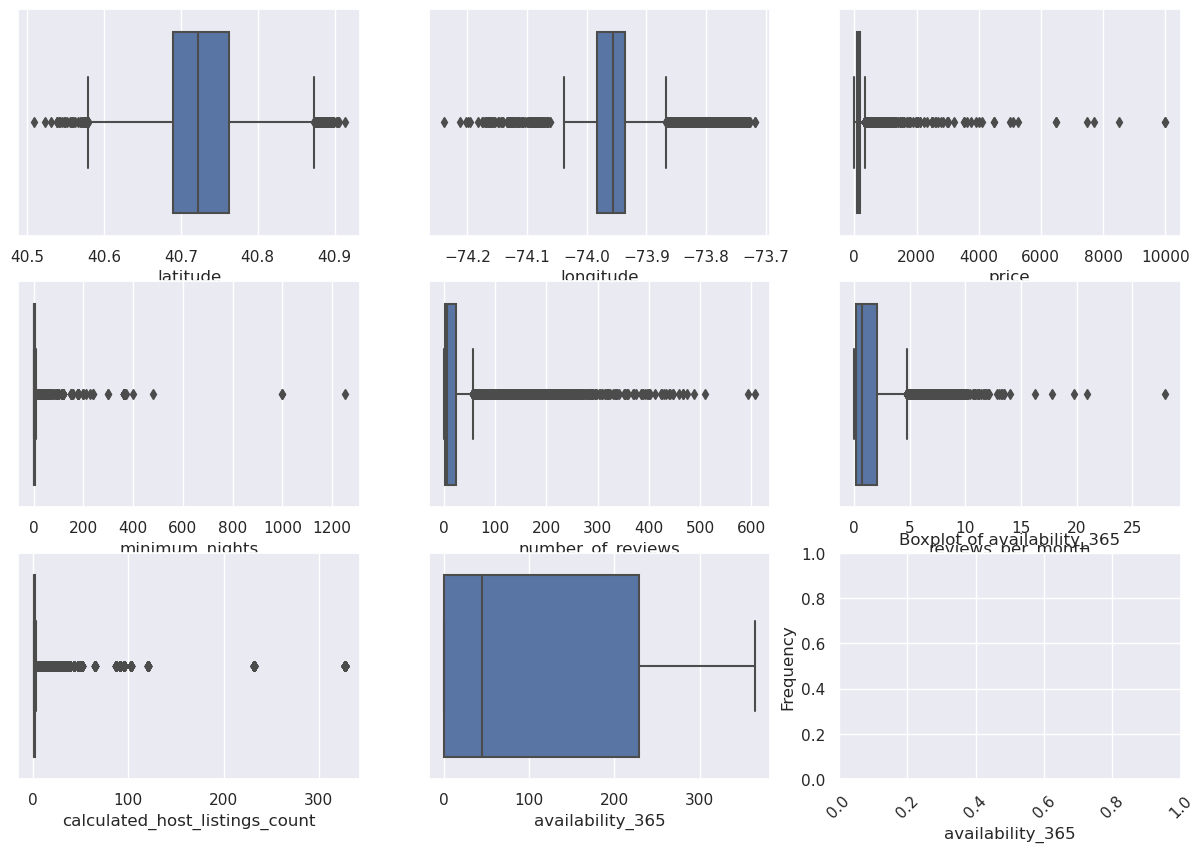

In [14]:
# get boxplots for the numerical features 
ed.plot_boxplot(new_df, num_columns)

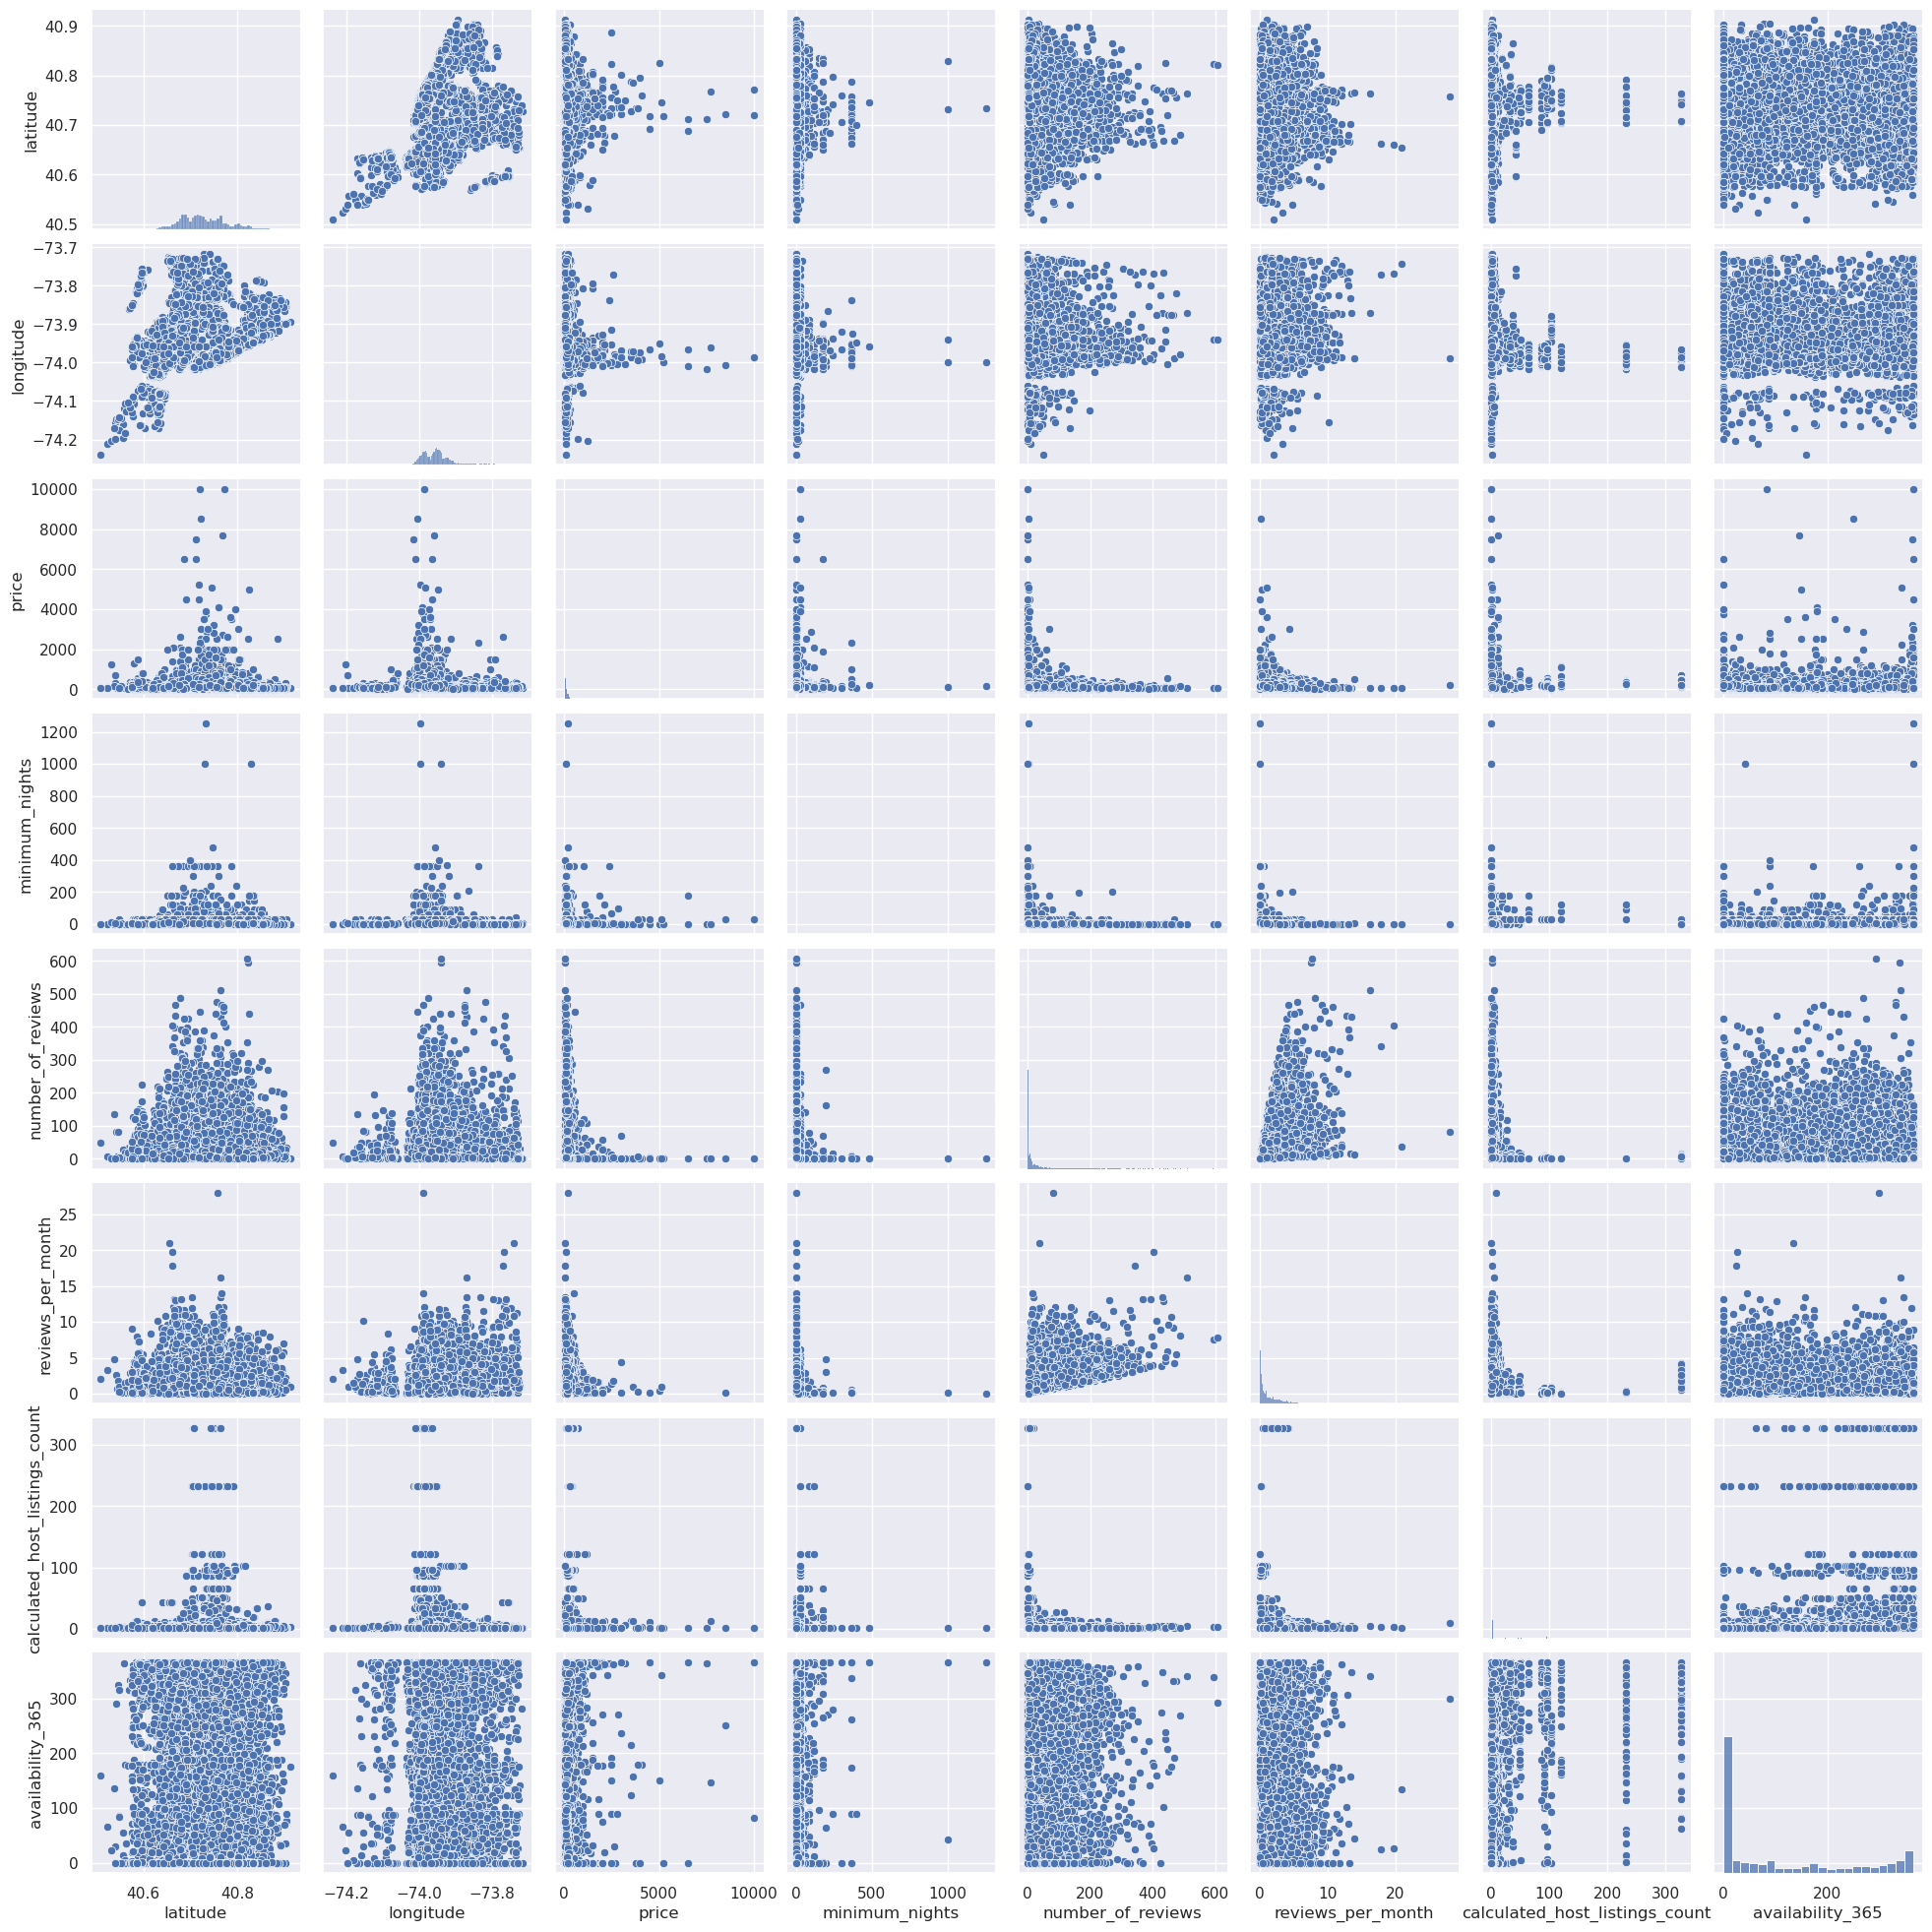

In [15]:
# get pairplots 
sns.pairplot(num_df)

<module 'matplotlib.pyplot' from '/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/matplotlib/pyplot.py'>

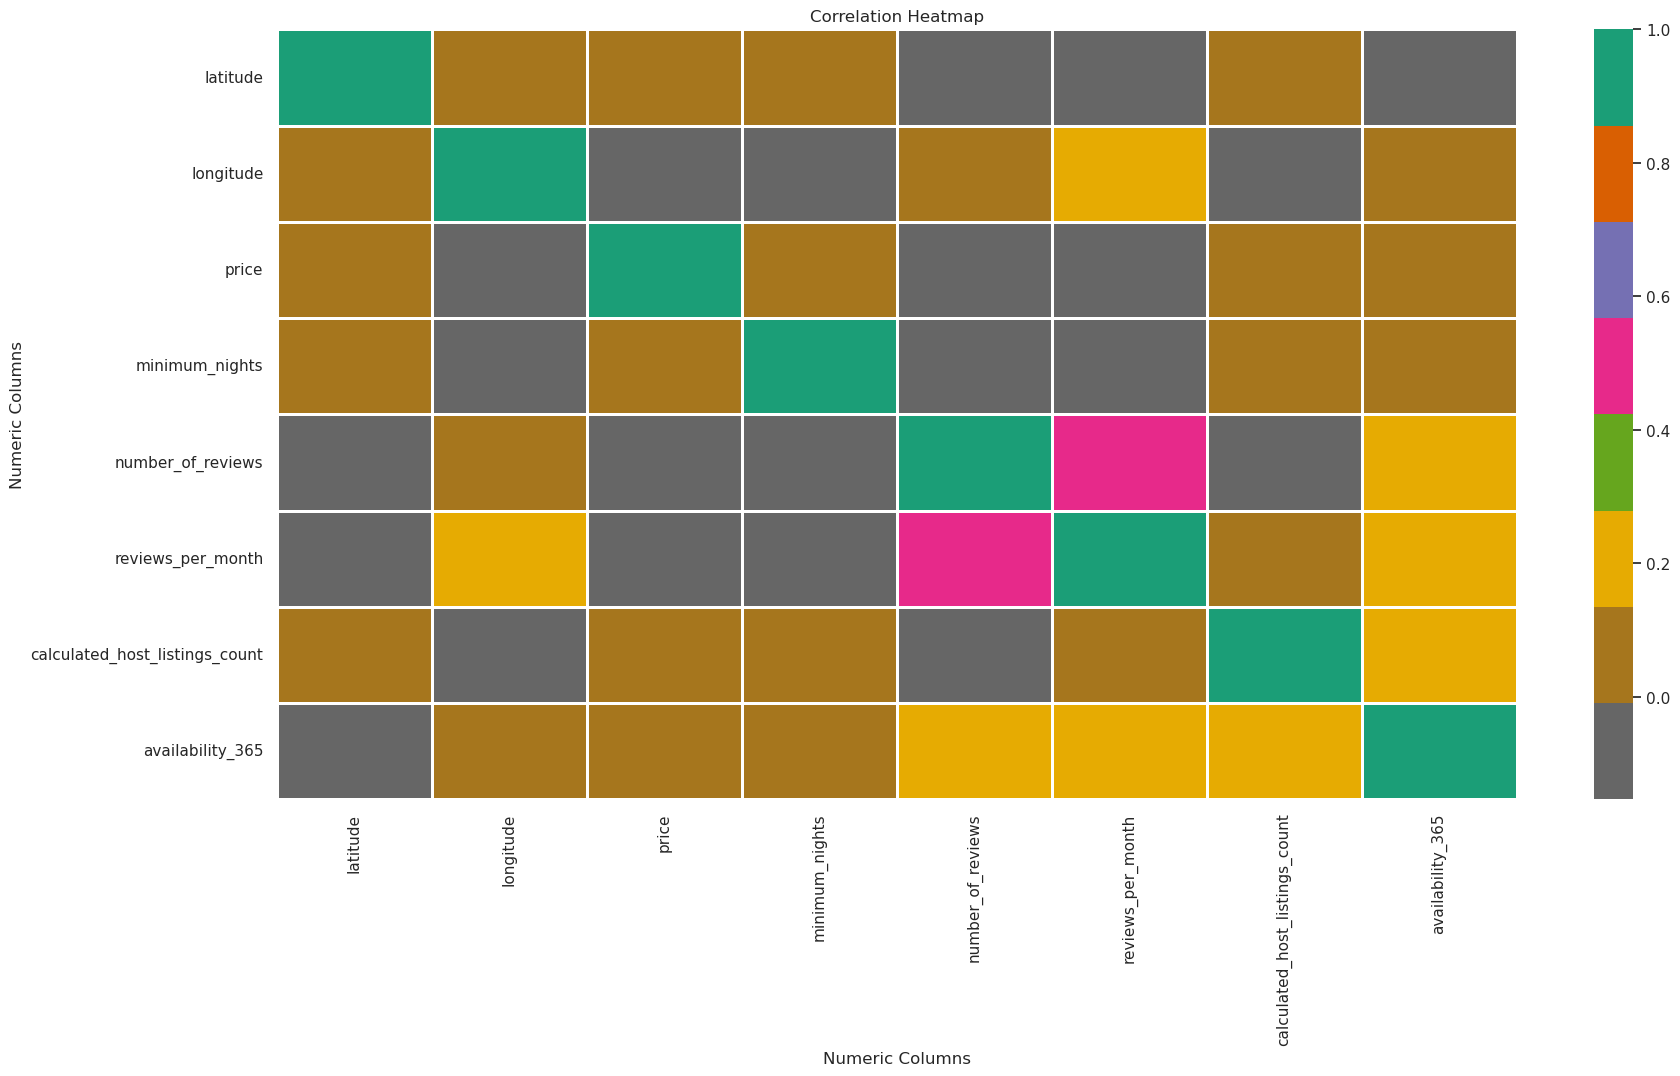

In [16]:
# get correlation heatmap for the numerical features
ed.plot_correlation(new_df)

Categorical Features

In [17]:
# get categorical features 
cat_columns = new_df.select_dtypes(include='object').columns.tolist()

In [18]:
cat_columns

['neighbourhood_group', 'neighbourhood', 'room_type']

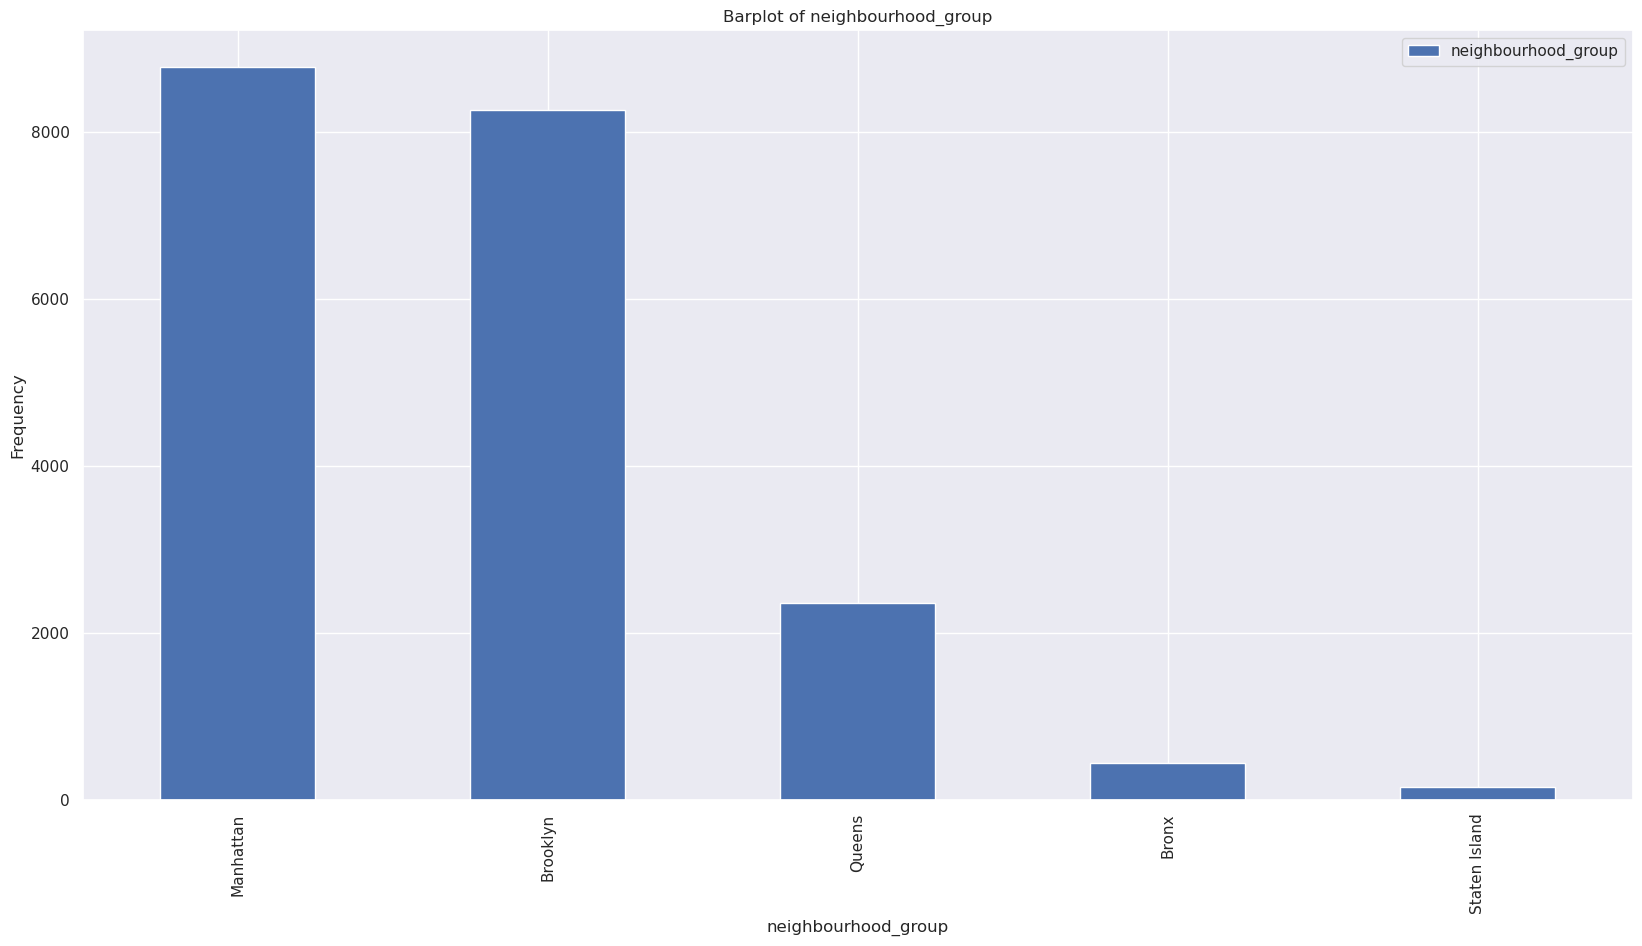

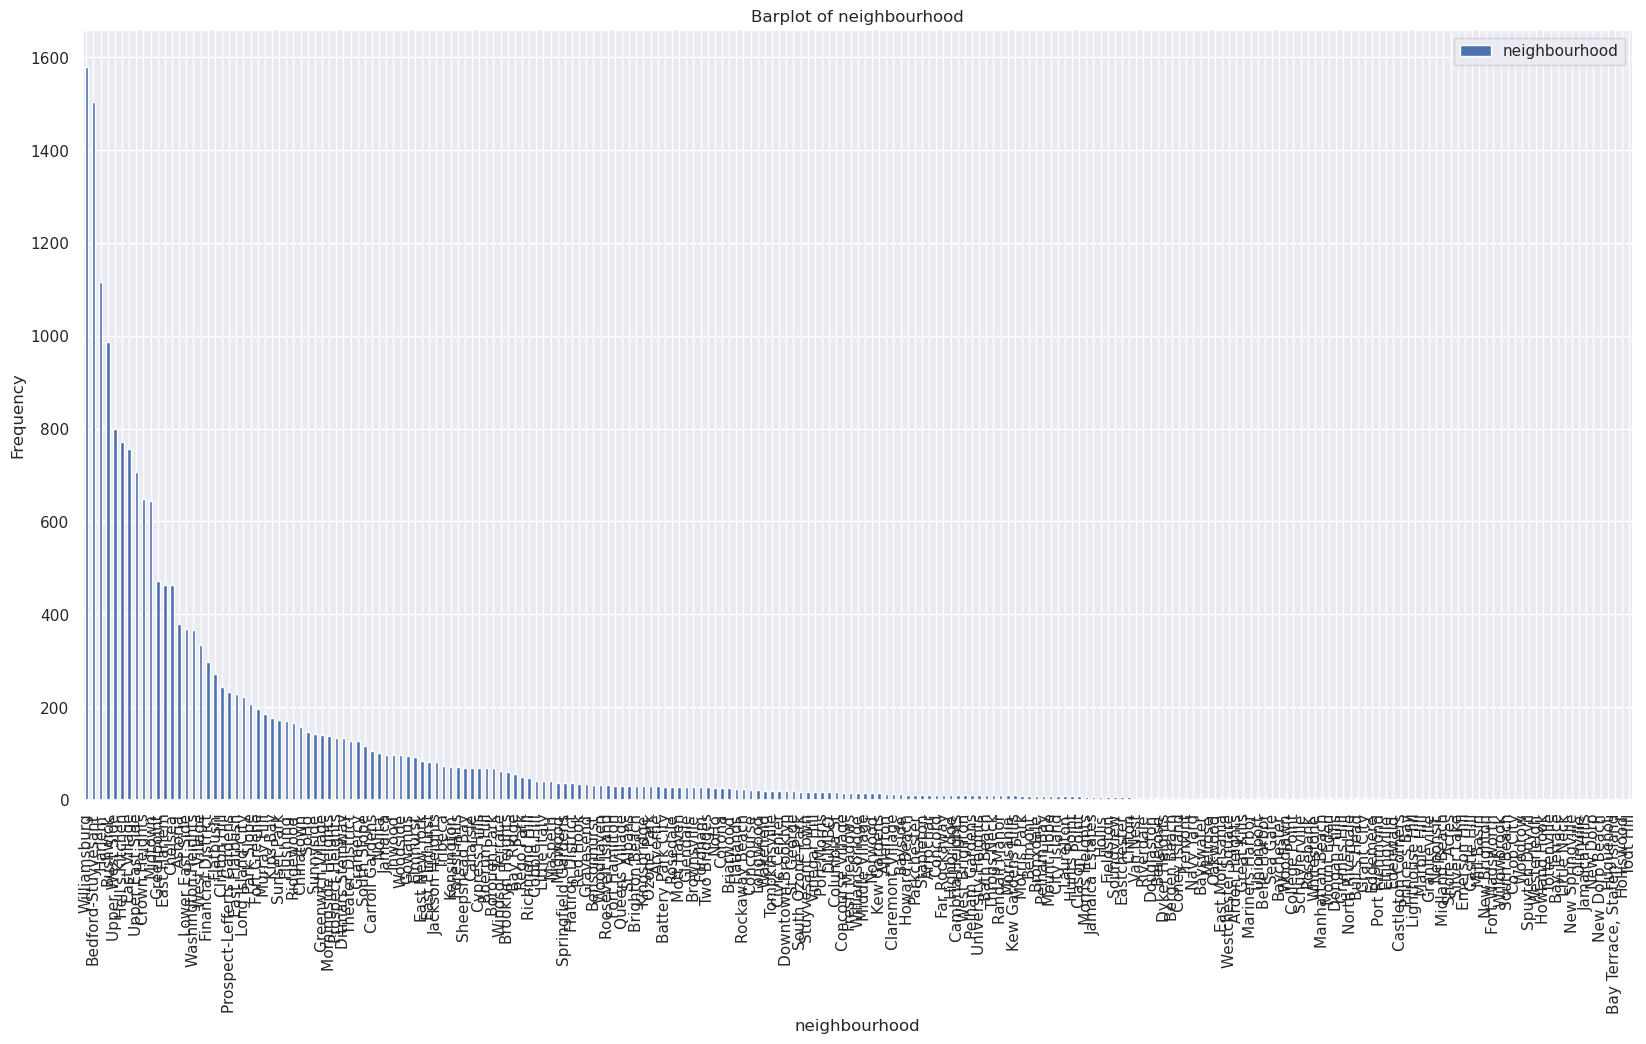

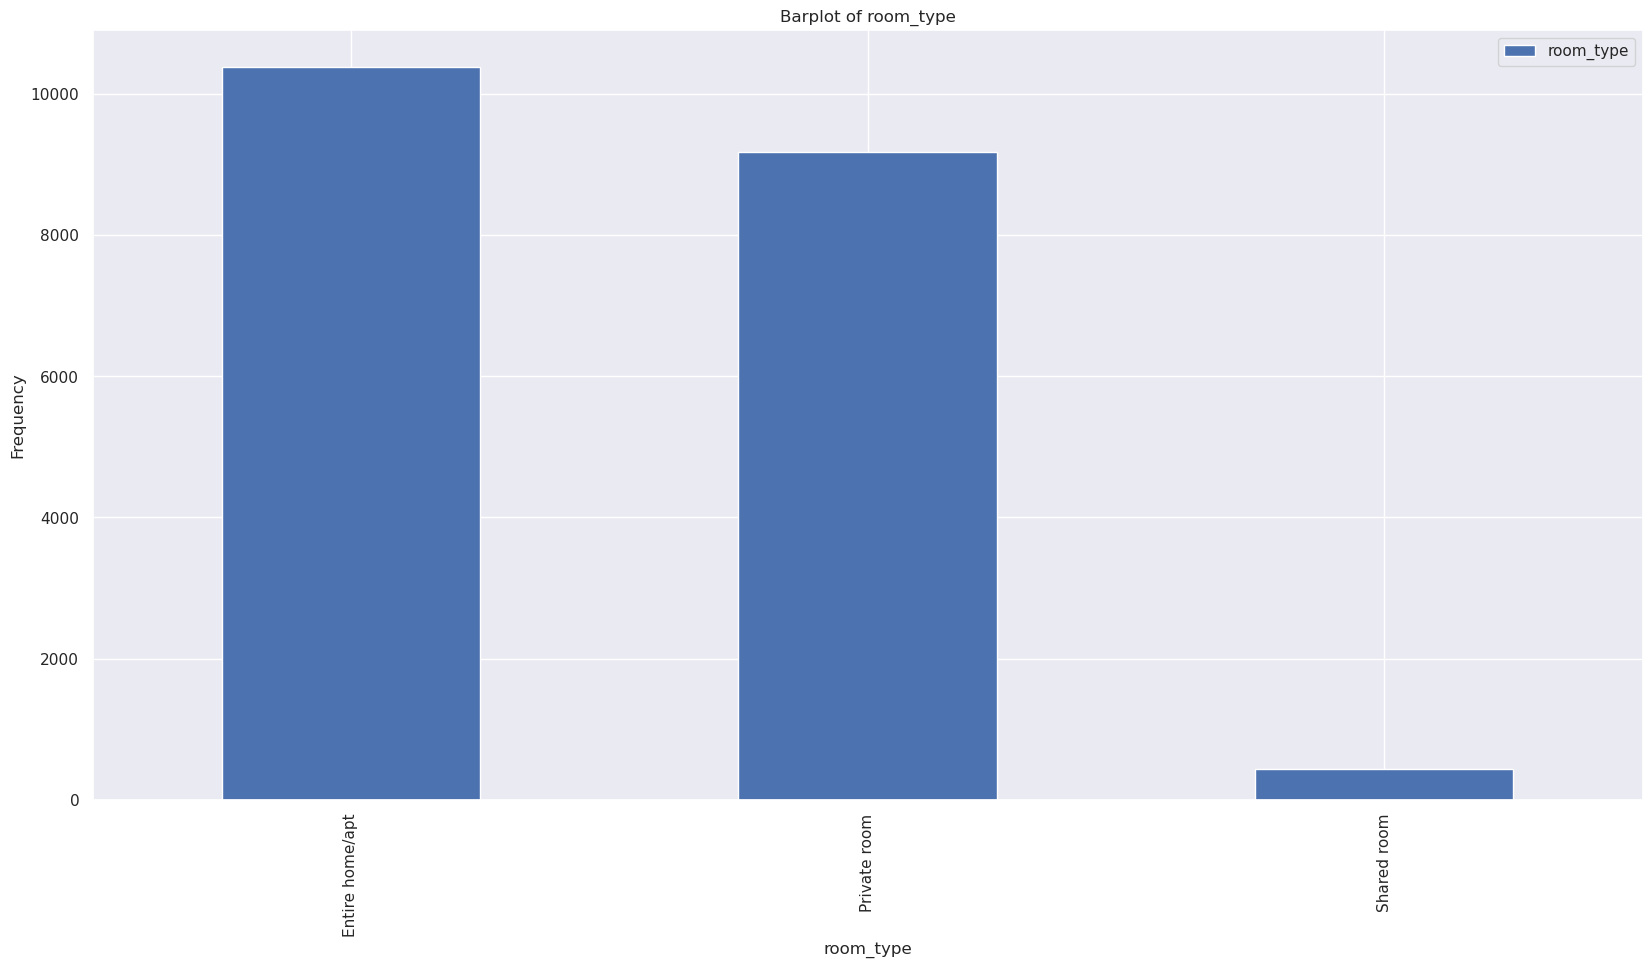

In [19]:
# get barplots for the categorical features
for col in cat_columns:
    plot = ed.plot_barplot(new_df, col)
    plot.show() 

Get Profile Report

In [20]:
# get the profile report for the original dataframe
profile = ProfileReport(df, title="Profiling Report")

Summarize dataset:  96%|████████████████████████████████████████████████████████████████████████   | 121/126 [00:24<00:01,  3.84it/s, Missing diagram heatmap]/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
/home/mnahsan21/miniconda3/envs/mlflow-98454b373dd5cd544df7b8e59ec177a147888d9b/lib/python3.9/site-packages/ydata_profiling/model/missing.py:78: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Heatmap": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to fl

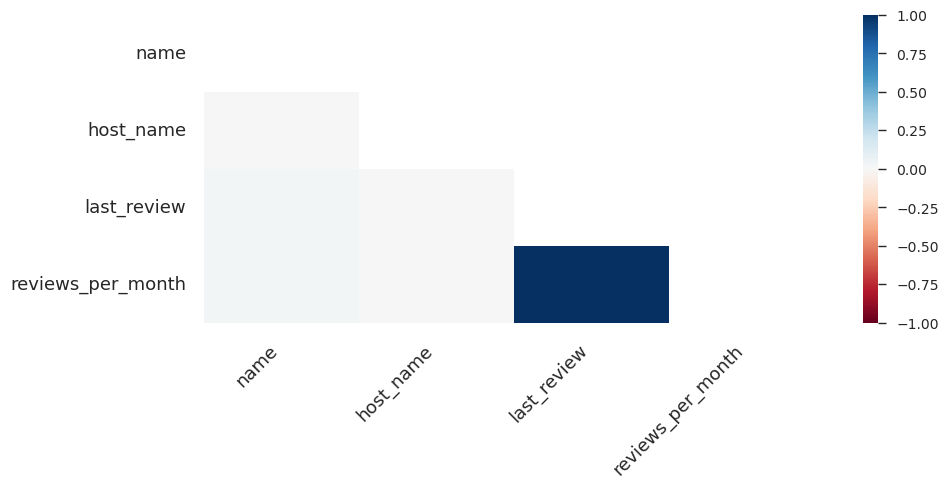

In [21]:
# export the report to HTML format
profile.to_file("Profiling_Report.html")

In [22]:
# Drop price outliers and adjust the prices based on the business requirments
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

Final Check

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

In [24]:
# get a new profile report 
new_profile = ProfileReport(df, title="Profiling Report")

In [25]:
# export the report to HTML format
profile.to_file("Updated_Profiling_Report.html")

Export report to file: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.36it/s]


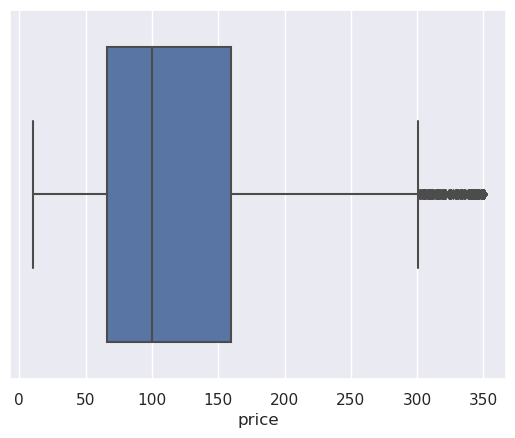

In [26]:
# get the updated boxplot of price
sns.boxplot(x=df['price']);

In [27]:
run.finish()